In [508]:
import numpy as np
import pandas as pd

In [509]:
data = pd.read_csv('Disaster.csv')

In [510]:
data.head()

,Temperature(c),Humidity(%),Rainfall(mm),Water_Level(m),Soil_Moisture(%),disaster_type
0,22,89,239.74,23.98,23,None
1,33,69,1293.81,17.36,22,Storm
2,28,67,1792.32,23.08,33,None
3,29,79,1136.65,1.50,35,Wildfire
4,43,72,681.19,3.94,26,Earthquake


In [511]:
data.shape

(1000, 6)

In [512]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature(c)    1000 non-null   int64  
 1   Humidity(%)       1000 non-null   int64  
 2   Rainfall(mm)      1000 non-null   float64
 3   Water_Level(m)    1000 non-null   float64
 4   Soil_Moisture(%)  1000 non-null   int64  
 5   disaster_type     1000 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


In [513]:
data.disaster_type.unique()

array(['None', 'Storm', 'Wildfire', 'Earthquake', 'Flood', 'Tornado'],
      dtype=object)

In [538]:
import seaborn as sns
import matplotlib.pyplot as plt

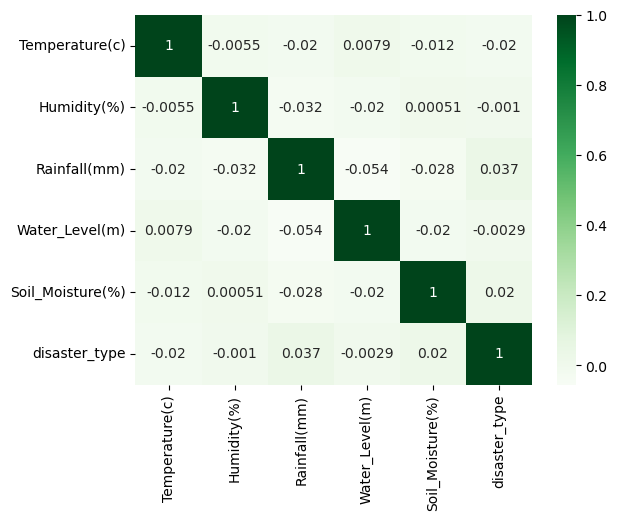

In [539]:
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

In [514]:
label_map = {'None': 0, 'Storm': 1, 'Wildfire': 2, 'Earthquake': 3, 'Flood': 4, 'Tornado': 5}

In [515]:
data['disaster_type'] = data['disaster_type'].map(label_map)

In [516]:
data.disaster_type.value_counts()

0    485
2    114
1    112
5    107
4     94
3     88
Name: disaster_type, dtype: int64

In [517]:
data.head()

,Temperature(c),Humidity(%),Rainfall(mm),Water_Level(m),Soil_Moisture(%),disaster_type
0,22,89,239.74,23.98,23,0
1,33,69,1293.81,17.36,22,1
2,28,67,1792.32,23.08,33,0
3,29,79,1136.65,1.50,35,2
4,43,72,681.19,3.94,26,3


In [518]:
y=data.disaster_type
x=data.drop('disaster_type',axis=1)

In [519]:
x.head()

,Temperature(c),Humidity(%),Rainfall(mm),Water_Level(m),Soil_Moisture(%)
0,22,89,239.74,23.98,23
1,33,69,1293.81,17.36,22
2,28,67,1792.32,23.08,33
3,29,79,1136.65,1.50,35
4,43,72,681.19,3.94,26


In [520]:
y.head()

0    0
1    1
2    0
3    2
4    3
Name: disaster_type, dtype: int64

In [521]:
type(y)

pandas.core.series.Series

In [522]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=8)

In [523]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [524]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 5), (200, 5), (800,), (200,))

In [525]:
x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [526]:
model=XGBClassifier()

In [527]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [528]:
y_pred=model.predict(x_test)

In [529]:
y_pred

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 2, 0, 0, 0, 3, 4, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 3, 4, 5,
       0, 0, 0, 0, 3, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 2, 0, 0, 5, 0,
       0, 0], dtype=int64)

In [530]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cmr=classification_report(y_test,y_pred)

In [531]:
cm

array([[81,  5,  3,  3,  2,  2],
       [17,  2,  1,  3,  0,  1],
       [23,  1,  3,  0,  1,  0],
       [12,  1,  0,  0,  1,  0],
       [11,  0,  1,  0,  0,  0],
       [22,  0,  0,  1,  1,  2]], dtype=int64)

In [532]:
print(cmr)

              precision    recall  f1-score   support

           0       0.49      0.84      0.62        96
           1       0.22      0.08      0.12        24
           2       0.38      0.11      0.17        28
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        12
           5       0.40      0.08      0.13        26

    accuracy                           0.44       200
   macro avg       0.25      0.19      0.17       200
weighted avg       0.37      0.44      0.35       200



In [533]:
import pickle

In [534]:
filename = 'model.pkl'
pickle.dump(model,open(filename,'wb'))